In [1]:
################################################################### Spotify ####################################################################

##### <u>Introduction</u>:
In today’s music landscape, streaming platforms like Spotify, Apple Music, and Deezer have revolutionized how we consume and interact with music. By analyzing streaming data, we can uncover trends that reveal not just what people are listening to, but how their preferences are evolving over time. This analysis dives deep into a dataset of popular tracks, exploring various factors like artist popularity, musical characteristics, and the influence of different streaming platforms. Through this exploration, we aim to gain a comprehensive understanding of the driving forces behind the most successful tracks and how listeners engage with music in the modern era.

### Data Cleaning:

In [1]:
# --- Read the file for analyse
#
#

import pandas as pd
df = pd.read_csv('Spotify Most Streamed Songs.csv')


In [3]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
print(df.to_string())

                                                                                                                      track_name                                                                                                               artist(s)_name  artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts                                                                                                 streams  in_apple_playlists  in_apple_charts in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm  key   mode  danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%                                                         cover_url
0                                                                                            Seven (feat. Latto) (Explicit Ver.)                                                                                                             Latto, Jung Kook             2

In [6]:
# --- Took the amount of null values in the dataset
#
#

null_val_cout = df.isnull().sum()
print(null_val_cout)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64


In [7]:
# --- Replaced all spaces with '_' and Capitalized 
#
#

for i in df:
    j = i.replace(' ','_')
    df = df.rename(columns={i:j.capitalize()})
    

In [8]:
# --- Tried to interpolate but can't, because the data type is string
#
#

# df['Key'].interpolate(method='polynomial', order=5, inplace=True)
 

In [9]:
# --- Dropping rows with NaN values in the 'In_shazam_charts' column (We need to drop because interpolate didn't work!)
#
#

df = df.dropna(subset=['In_shazam_charts'])

In [10]:
# --- Dropped the Unwanted column "Key" and  "Cover url" from the dataframe 
#
#

del df['Key']
del df['Cover_url']

In [11]:
# --- Made a new column Date and combined all 3 columns together (changed to string otherwise didn't work)
#
#

df['Date'] = pd.to_datetime(df['Released_year'].astype(str) + '/' + df['Released_month'].astype(str) + '/' + df['Released_day'].astype(str))


In [12]:
# --- Dropped one more column with unwanted value and placed into a new variable (df_cleaned)
#
#

df_cleaned = df[df['Streams'] != 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

### <u>*1-What are the top 10 most streamed tracks?*</u>

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

# Converted the datatype of column "Streams" to int 
df_cleaned.loc[:,'Streams'] = df_cleaned['Streams'].astype(int)

# Took the most streamed 10 songs 
top_10_tracks = df_cleaned.sort_values(by='Streams', ascending=False).head(10).reset_index()
print(top_10_tracks[['Track_name', 'Artist(s)_name', 'Streams']].to_string())


                                      Track_name                Artist(s)_name     Streams
0                                   Shape of You                    Ed Sheeran  3562543890
1  Sunflower - Spider-Man: Into the Spider-Verse         Post Malone, Swae Lee  2808096550
2                                      One Dance           Drake, WizKid, Kyla  2713922350
3                      STAY (with Justin Bieber)  Justin Bieber, The Kid Laroi  2665343922
4                                       Believer               Imagine Dragons  2594040133
5                                         Closer      The Chainsmokers, Halsey  2591224264
6                                        Starboy         The Weeknd, Daft Punk  2565529693
7                                        Perfect                    Ed Sheeran  2559529074
8                                      Seï¿½ï¿½o  Shawn Mendes, Camila Cabello  2484812918
9                           Say You Won't Let Go                  James Arthur  2420461338

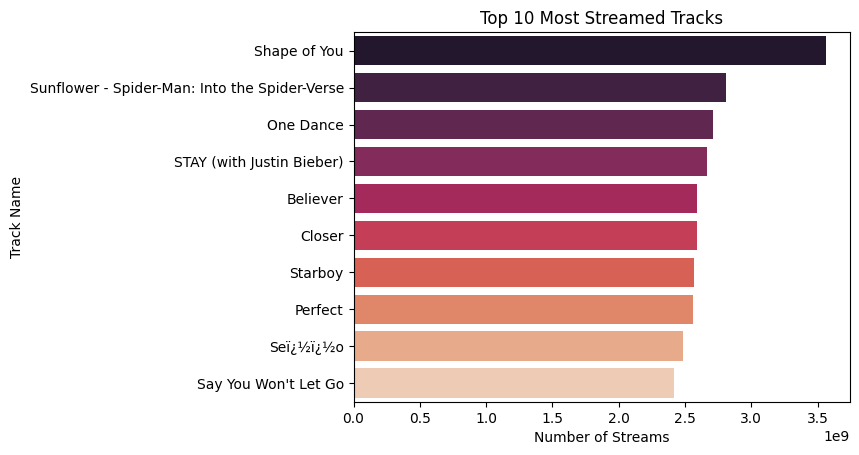

In [14]:

# Plotting total streams by artist count
sns.barplot(x='Streams', y='Track_name', data=top_10_tracks, hue='Track_name', palette='rocket')
plt.title('Top 10 Most Streamed Tracks')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')

# Display the plot
plt.show()

##### From the dataset the top 10 streamed songs are listed, The most streamed song is "Shape of you" by "Ed Sheeran"

### <u>*2-Which year and month has the highest number of track releases*</u>

##### Justification:

In [15]:

import matplotlib.pyplot as plt

# Group by Released_year and count the number of tracks released
tracks_per_year = df_cleaned.groupby('Released_year').size().reset_index(name='Track_Count')

# Sort by Track_Count in descending order to find the year with the most releases
tracks_per_year = tracks_per_year.sort_values(by='Track_Count', ascending=False)

# Shows the first 10 values
print(tracks_per_year.head(10))


# Group by Released_month and count the number of tracks released
tracks_per_month = df_cleaned.groupby('Released_month').size().reset_index(name='Track_Count')

# Sort by Track_Count in descending order to see which month has the most popular releases
tracks_per_month = tracks_per_month.sort_values(by='Track_Count', ascending=False)

print(tracks_per_month.head(10))


    Released_year  Track_Count
47           2022          398
48           2023          175
46           2021          103
45           2020           30
44           2019           29
42           2017           21
41           2016           17
39           2014           12
38           2013           12
40           2015           10
    Released_month  Track_Count
4                5          124
0                1          122
2                3           82
5                6           81
10              11           75
11              12           73
9               10           69
3                4           66
1                2           60
6                7           56


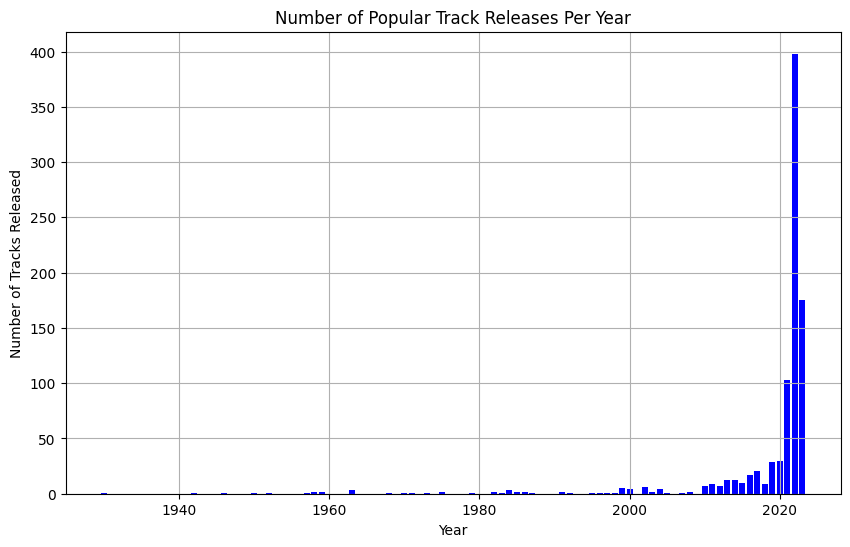

In [16]:

# Plot for tracks released per year
plt.figure(figsize=(10,6))
plt.bar(tracks_per_year['Released_year'], tracks_per_year['Track_Count'], color='blue')
plt.title('Number of Popular Track Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.grid(True)

# Display the plot
plt.show()


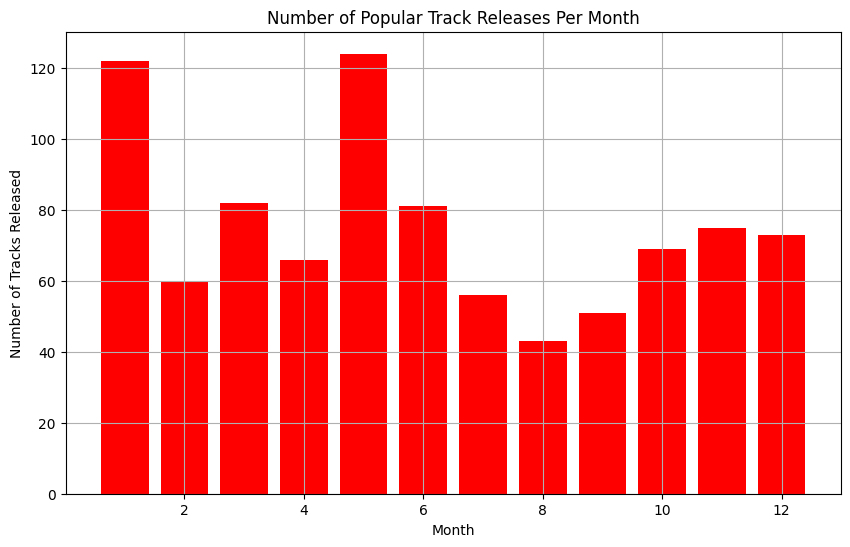

In [17]:

# Plot for tracks released per month
plt.figure(figsize=(10,6))
plt.bar(tracks_per_month['Released_month'], tracks_per_month['Track_Count'], color='red')
plt.title('Number of Popular Track Releases Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.grid(True)

# Display the plot
plt.show()

##### From the dataset we can say that the year 2022 has the highest number of track release and in month May has the highest number of track release.

### <u>*3-Are solo artists or groups more popular in terms of streams?*</u>

##### Justification:

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt


# Converted the datatype of column "Streams" to int 
df_cleaned.loc[:,'Streams'] = df_cleaned['Streams'].astype(int)

# Group by 'Artist_count' and calculate sum, mean, and count
artist_popularity = df_cleaned.groupby('Artist_count')['Streams'].agg(['sum', 'mean', 'count'])

# Rename columns for clarity
artist_popularity.columns = ['Total_Streams', 'Average_Streams', 'Track_Count']

# Showing the columns
print(artist_popularity)


             Total_Streams   Average_Streams  Track_Count
Artist_count                                             
1             280868550237  512533850.797445          548
2             105781556561   431761455.35102          245
3              30427596978  366597553.951807           83
4               4591593697  306106246.466667           15
5                724041002       144808200.4            5
6                262399359        87466453.0            3
7                245400167       245400167.0            1
8                346442347       173221173.5            2


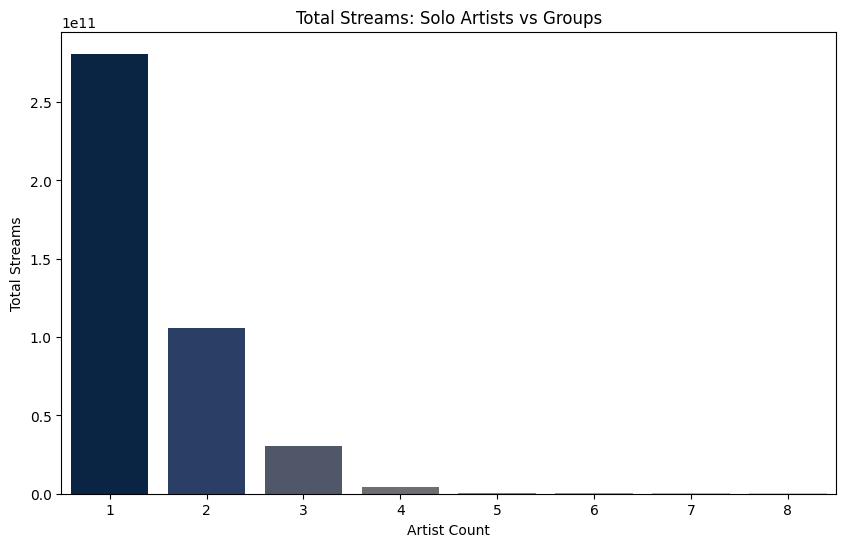

In [19]:

# Plotting total streams by artist count
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_popularity.index, y=artist_popularity['Total_Streams'], hue=artist_popularity.index, legend=False, palette='cividis')
plt.title('Total Streams: Solo Artists vs Groups')
plt.xlabel('Artist Count')
plt.ylabel('Total Streams')

# Display the plot
plt.show()

##### Here we can understand from the analysis that the Solo artists are more popular in terms of streams. And the chart shows that when the number of artist increases the interest of peoples to watch is decreasing!.

### <u>*4-How do tracks perform across different platforms (Spotify, Apple Music, Deezer)?*</u>

##### Justification:

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt


# In (In_deezer_playlists) there is ',' and we replaced in with ' '  
df_cleaned.loc[:,'In_deezer_playlists'] = df_cleaned['In_deezer_playlists'].str.replace(',', '')

# Converted the datatype of column "Streams" to int 
df_cleaned.loc[:,'In_deezer_playlists'] = df_cleaned['In_deezer_playlists'].astype(int)

# We found the sum of In playlists and In charts
platform_summary = df_cleaned[['In_spotify_playlists','In_spotify_charts',
                               'In_apple_playlists','In_apple_charts',
                               'In_deezer_playlists','In_deezer_charts']].sum()


In [21]:
#
#
# Create new columns for playlist presence on each platform
df['Spotify_playlist_presence'] = df_cleaned['In_spotify_playlists'] > 0
df['Apple_playlist_presence'] = df_cleaned['In_apple_playlists'] > 0
df['Deezer_playlist_presence'] = df_cleaned['In_deezer_playlists'] > 0

#
#
# Calculate the percentage of tracks in playlists on each platform
playlist_comparison = df[['Spotify_playlist_presence', 
                          'Apple_playlist_presence', 
                          'Deezer_playlist_presence']].mean() * 100

In [22]:
#
#
# Create new columns for charts presence on each platform
df['Spotify_charts_presence'] = df_cleaned['In_spotify_charts'] > 0
df['Apple_charts_presence'] = df_cleaned['In_apple_charts'] > 0
df['Deezer_charts_presence'] = df_cleaned['In_deezer_charts'] > 0

#
#
# Calculate the percentage of tracks in charts on each platform
charts_comparison = df[['Spotify_charts_presence', 
                          'Apple_charts_presence', 
                          'Deezer_charts_presence']].mean() * 100

In [23]:
#
#
# Create a DataFrame for platform comparison
platform_comparison = pd.DataFrame({
    'Platform': ['Spotify Playlists', 'Apple Playlists', 'Deezer Playlists', 
                 'Spotify Charts', 'Apple Charts', 'Deezer Charts'],
    'Presence (%)': [playlist_comparison['Spotify_playlist_presence'], 
                     playlist_comparison['Apple_playlist_presence'], 
                     playlist_comparison['Deezer_playlist_presence'],
                     charts_comparison['Spotify_charts_presence'], 
                     charts_comparison['Apple_charts_presence'], 
                     charts_comparison['Deezer_charts_presence']]
})

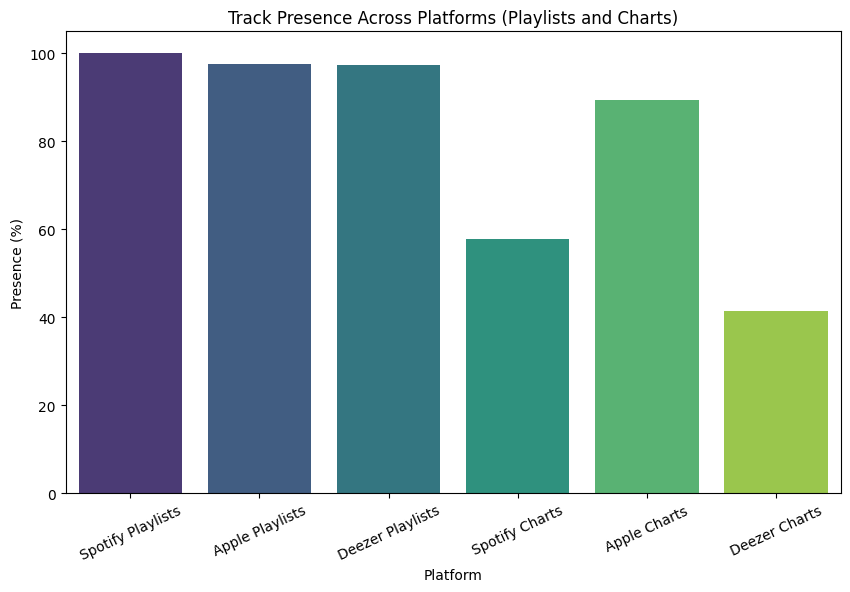

In [24]:
# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Platform', y='Presence (%)', hue='Platform', data=platform_comparison, palette='viridis')
plt.xticks(rotation=25)
plt.title('Track Presence Across Platforms (Playlists and Charts)')

# Display the plot
plt.show()

# //////////// In case an error occur while running use str.replace on the replace code ///////////////

##### When we look to the playlist data the spotify have the most presence of songs and the others are not so low around 95% of songs are present in the playlists, And when comes to the charts the apple charts have the most percentage of songs and deezer has the lowest.


### <u>*5-What is the average Bpm, Energy_%, or Danceability_% of the top-streamed songs?*</u>

##### Justification:

In [25]:

import matplotlib.pyplot as plt

# Took the top 10 streamed songs
top_10_tracks = df_cleaned.sort_values(by='Streams', ascending=False).head(10)

# Found the Average of the Bpm,Energy and Danceability if the top 10 songs
feature_mean_value = top_10_tracks[['Bpm','Energy_%','Danceability_%']].mean()

# Showing the Average values
print(feature_mean_value.to_string())

Bpm               117.7
Energy_%           59.6
Danceability_%     69.1


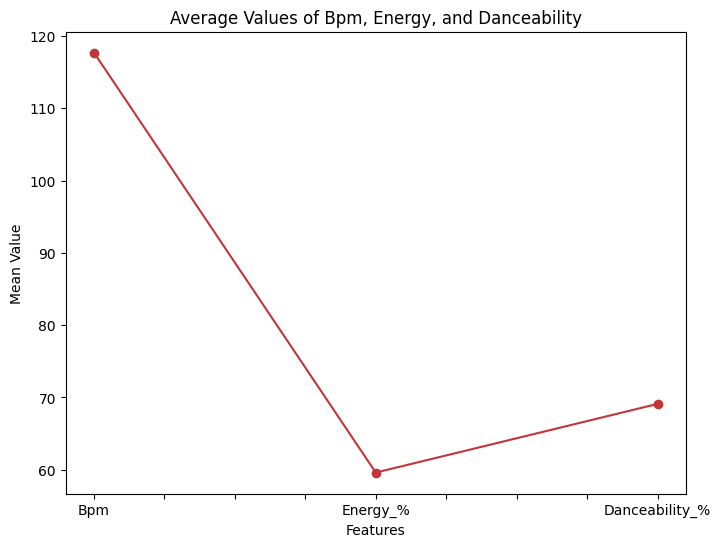

In [26]:

# Plotting the mean values as a line plot
feature_mean_value.plot(kind='line',marker='o', figsize=(8,6), color= sns.color_palette('RdBu'))
plt.title('Average Values of Bpm, Energy, and Danceability')
plt.xlabel('Features')
plt.ylabel('Mean Value')

# Display the plot
plt.show()

##### As per the data the Average(mean) of Bpm, Energy and Danceability has been plotted clearly

### <u>*6-What types of songs (Valence_%, Acousticness_%, Speechiness_%, etc.) are more likely to appear on playlists?*</u>

##### Justification:

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns

# Took the songs which are on any playlist
df_cleaned.loc[:,'On_any_playlist'] = (df_cleaned['In_spotify_playlists'] > 0) | (df_cleaned['In_apple_playlists'] > 0) | (df_cleaned['In_deezer_playlists'] > 0)

# Put the songs in a variable
playlist_tracks = df_cleaned[df_cleaned['On_any_playlist'] == True]

# Got the average of the columns
playlist_features_avg = playlist_tracks[['Danceability_%','Valence_%', 'Acousticness_%','Energy_%','Acousticness_%','Instrumentalness_%','Liveness_%','Speechiness_%']].mean()

# Converted into dataframe for plotting
feature_comparison = pd.DataFrame({
    'On Playlist': playlist_features_avg,
})

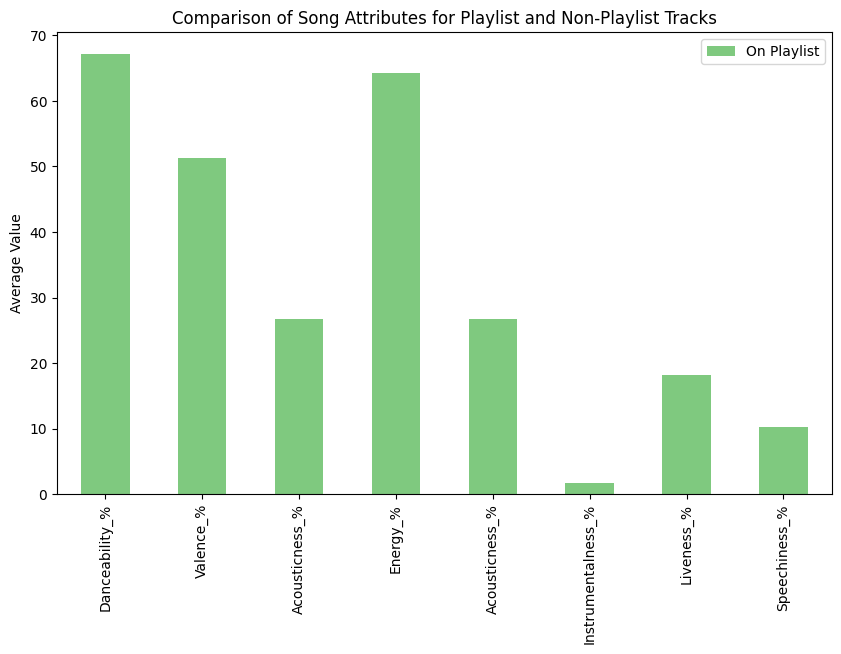

In [28]:

# plotting the data 
feature_comparison.plot(kind='bar', figsize=(10,6), color=sns.color_palette('Accent'))
plt.title('Comparison of Song Attributes for Playlist and Non-Playlist Tracks')
plt.ylabel('Average Value')

# Display the plot
plt.show()


##### From the data we can conclude that the songs with danceability are more in the playlists of users and the songs with more energy are also in the playlist as second. The songs with instrumentalness are the least songs which are the playlist, it says that the people who likes intrumentalness are very less.

### <u>*7-How has the average energy percentage of tracks changed over the years, and are there any noticeable trends in specific periods?*</u>

##### Justification:

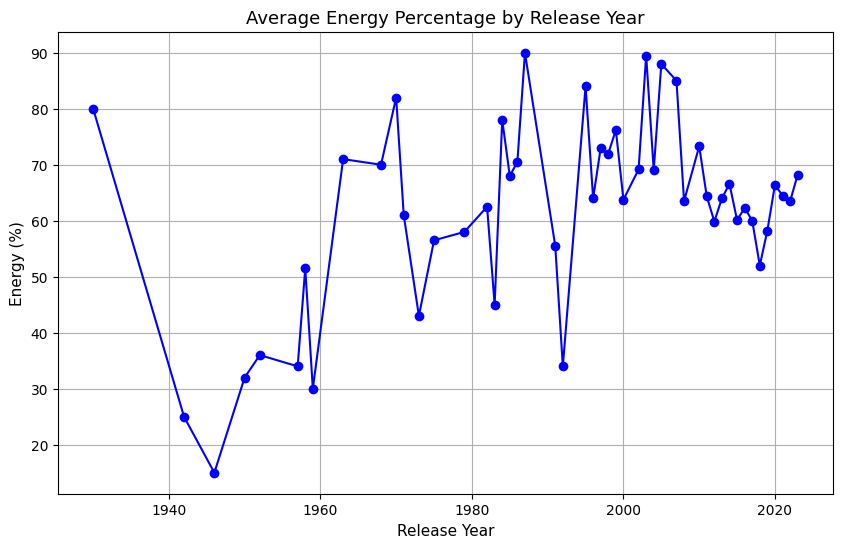

In [29]:

import matplotlib.pyplot as plt

# The average value of energy over the years in sorted form
yearly_energy_mean = df_cleaned.groupby('Released_year')['Energy_%'].mean().sort_index(ascending=False)

# plotting the data
plt.figure(figsize=(10,6))
plt.plot(yearly_energy_mean.index, yearly_energy_mean.values, marker='o', color='b')

# Adding labels and title
plt.title('Average Energy Percentage by Release Year', fontsize=13)
plt.xlabel('Release Year', fontsize=11)
plt.ylabel('Energy (%)', fontsize=11)

# Display the plot
plt.grid(True)
plt.show()



##### There is a simple trend happened after 1946, from there the average energy kept increasing over years and it keeps the average between 60 and 80 percentage, And after 2003 the trend changed very lightly to down from 89% and still keeps the average. 

### <u>*8-Is there a correlation between the tempo (BPM) of tracks and their danceability, indicating whether faster songs tend to be more danceable?*</u>

##### Justification:

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation between Bpm and Danceability
correlation = df_cleaned['Bpm'].corr(df_cleaned['Danceability_%'])

# Print the correlation 
print(f"Correlation between BPM and Danceability: {correlation}")


Correlation between BPM and Danceability: -0.1415809935420465


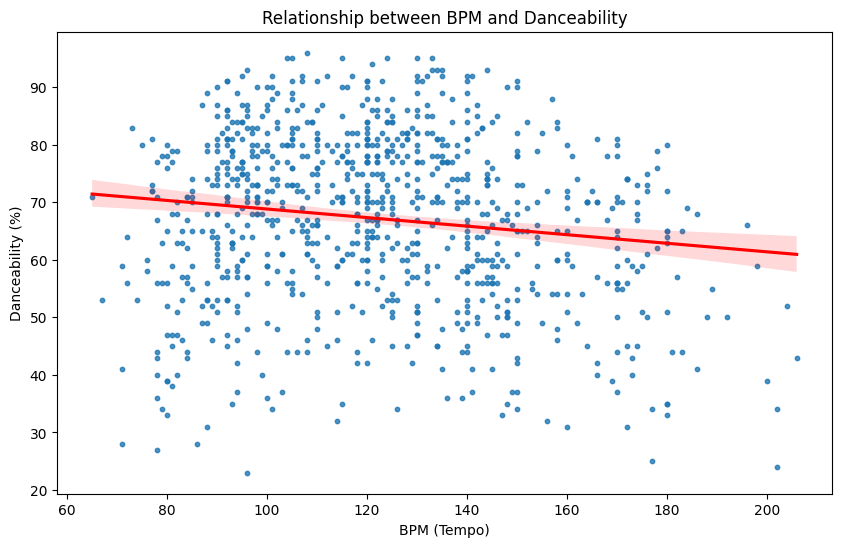

In [31]:
# Create a scatter plot with a trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Bpm', y='Danceability_%', data=df_cleaned, scatter_kws={'s': 10}, line_kws={"color": "red"})

# Set plot labels and title
plt.title('Relationship between BPM and Danceability')
plt.xlabel('BPM (Tempo)')
plt.ylabel('Danceability (%)')

# Show the plot
plt.show()

##### The correlation value of -0.1416 indicates that as the BPM increases, Danceability tends to decrease slightly, The faster songs makes the danceability less.

### <u>*9-What is the most common musical mode (Major or Minor) among the popular tracks, and how does the mode affect the valence of these songs?*</u>

##### Justification:

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

# Took the top popular 20 songs
popular_tracks = df_cleaned.sort_values(by='Streams',ascending=False).head(20)

# Most common musical mode
most_common_musical_mode = popular_tracks.groupby('Mode')['Streams'].size()
print(most_common_musical_mode)

# Valance average of the modes of songs
valance_of_songs = popular_tracks.groupby('Mode')['Valence_%'].mean()
print(valance_of_songs)


Mode
Major    11
Minor     9
Name: Streams, dtype: int64
Mode
Major    47.000000
Minor    50.777778
Name: Valence_%, dtype: float64


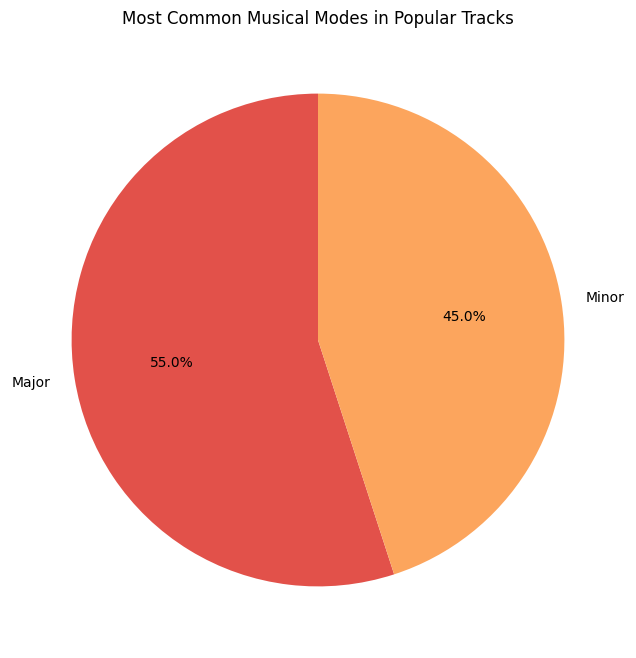

In [33]:

import matplotlib.pyplot as plt

# Plotting a pie chart for the most common musical modes
plt.figure(figsize=(8, 8))
plt.pie(
    most_common_musical_mode.values,
    labels=most_common_musical_mode.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Spectral')
)

plt.title('Most Common Musical Modes in Popular Tracks')
plt.show()


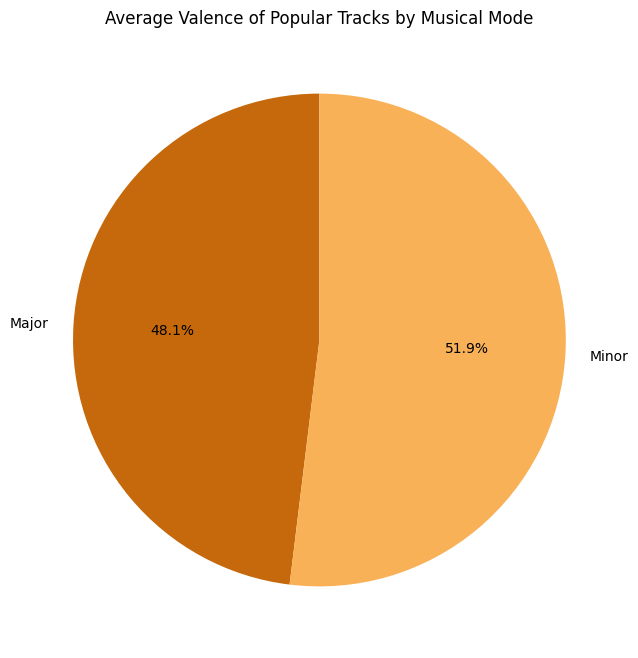

In [34]:

import matplotlib.pyplot as plt

# Plotting a pie chart for the most common musical modes
plt.figure(figsize=(8, 8))
plt.pie(
    valance_of_songs.values,
    labels=valance_of_songs.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('PuOr')
)

plt.title('Average Valence of Popular Tracks by Musical Mode')
plt.show()

##### It seems to be that the most common musical mode amoung popular tracks is Major, And the Minor mode has the highest average of valence.

### <u>*10-Which artists or bands have the most tracks with high stream counts over multiple years?*</u>

##### Justification:

In [35]:

# Group by artist and year, summing the streams for each group
artist_streams = df_cleaned.groupby(['Artist(s)_name', 'Released_year']).agg({'Streams': 'sum', 'Track_name': 'count'}).reset_index()


# Rename columns for clarity
artist_streams = artist_streams.rename(columns={'Track_name': 'Number_of_Tracks', 'Streams': 'Total_Streams'})

# Sort the artists by the total streams and number of tracks in descending order
top_artists = artist_streams.groupby('Artist(s)_name').agg({'Total_Streams': 'sum', 'Number_of_Tracks': 'sum'})
top_artists = top_artists.sort_values(by='Total_Streams', ascending=False).head(10)

print(top_artists)


                Total_Streams  Number_of_Tracks
Artist(s)_name                                 
Taylor Swift      14053658300                34
Ed Sheeran        11051252012                 7
Bad Bunny          9997799607                19
The Weeknd         9815205161                19
Harry Styles       6772877034                15
Eminem             6183805596                 4
Bruno Mars         5846920599                 4
Arctic Monkeys     5569806731                 4
Imagine Dragons    5272484650                 3
SZA                4557811204                19


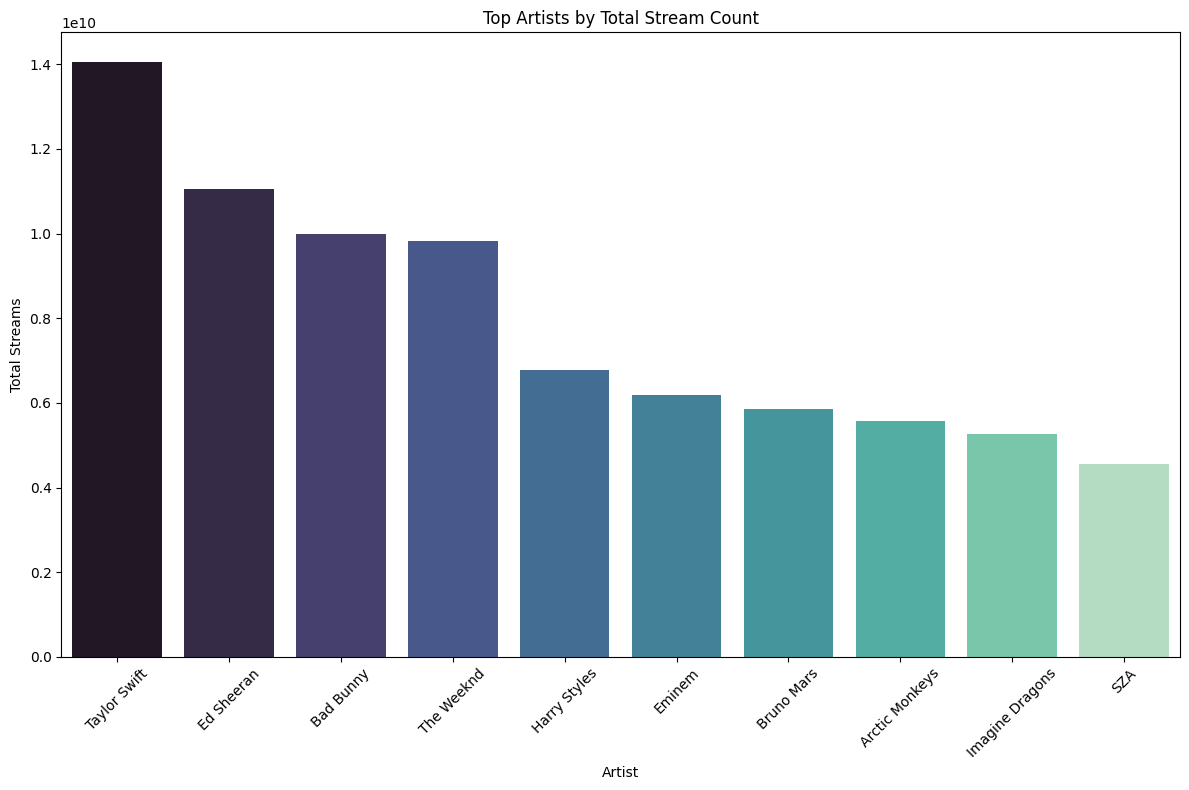

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for top artists by total stream count and number of tracks
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.index, y=top_artists['Total_Streams'], hue=top_artists.index, palette='mako')
plt.title('Top Artists by Total Stream Count')
plt.xlabel('Artist')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Over multiple years Taylor Swift has the most tracks with high stream counts and Ed Sheeran also have a great stream count. 

##### <u>Conclusion</u>:

From the dataset analysis, several clear trends emerge:

1. Top Song and Artist: "Shape of You" by Ed Sheeran is the most streamed song. 
Taylor Swift consistently has the most tracks with high streams over the years.

2. Track Releases: The most tracks were released in 2022, especially in the month of May, showing a peak in musical production during that time.

3. Solo Artists Popularity: Solo artists are more popular in terms of streams. As the number of contributing artists increases, streams tend to decrease, indicating that listeners prefer solo performances.

4. Playlists and Charts: Spotify has the highest presence of songs in playlists, with 95% of tracks featured. However, Apple Music leads in charting songs, while Deezer has the least chart presence.

5. Song Characteristics:

      - There is a slight negative correlation between BPM and danceability, with a correlation value of -0.1416, indicating that faster-paced songs tend to be less danceable. This suggests that listeners may prefer mid-tempo songs for dancing rather than fast-paced ones.
   
      - BPM vs Danceability: Songs with higher energy and danceability are more likely to be included in users’ playlists, while tracks with high instrumentalness are the least represented in playlists. This shows a clear preference for energetic, lively tracks over more instrumental or abstract pieces.

      - Since 1946, the average energy level of songs has steadily increased, maintaining an average between 60% and 80%. However, post-2003, there is a slight but noticeable decline in average energy, settling at around 89%, possibly reflecting a shift in listener preferences toward more mellow music.

##### Final Insight
  From the analysis, it is clear that listener preferences lean towards solo artists, energetic tracks, and danceable music. 
  Spotify playlists play a dominant role in music discovery, but Apple Music charts represent the highest concentration of popular songs. 
  Over the years, music with high energy levels has become more common, though there has been a slight decline after 2003. 
  Songs in major keys are widely preferred, but minor key songs evoke stronger emotional responses (higher valence). 
  The trend suggests that while fast-paced music (higher BPM) is popular, it may not necessarily drive up danceability. 
  Ultimately, this reflects how audience preferences shape the music landscape, with a clear preference for engaging, energetic solo performances.